# Day 23
## Author: Sergio Esteban Tarrero
### Data Source: https://www.kaggle.com/datasets/zain280/fruit-consumption-habits

In [86]:
import pandas as pd

In [87]:
df_fruits = pd.read_csv('Fruits_Consumptions_Habits.csv')
df_fruits = df_fruits.dropna()
df_fruits = df_fruits.drop_duplicates()
df_fruits.shape

(1437, 7)

In [88]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df_fruits['Age Group'] = pd.cut(df_fruits['Age'], bins=bins, labels=labels, right=False)

In [89]:
grouped_data = df_fruits.groupby(['Age Group', 'Frequency of Consumption', 'Favorite Fruit']).size().reset_index(name='Count')

C:\Users\Sergio\AppData\Local\Temp\ipykernel_22452\2256690987.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [90]:
grouped_data.sort_values(by='Count', ascending=True).head()

,Age Group,Frequency of Consumption,Favorite Fruit,Count
0,0-20,2-3 times a week,Apple,0
95,61-80,Once a week,Apple,0
94,61-80,Daily,Strawberry,0
93,61-80,Daily,Orange,0
92,61-80,Daily,Mango,0


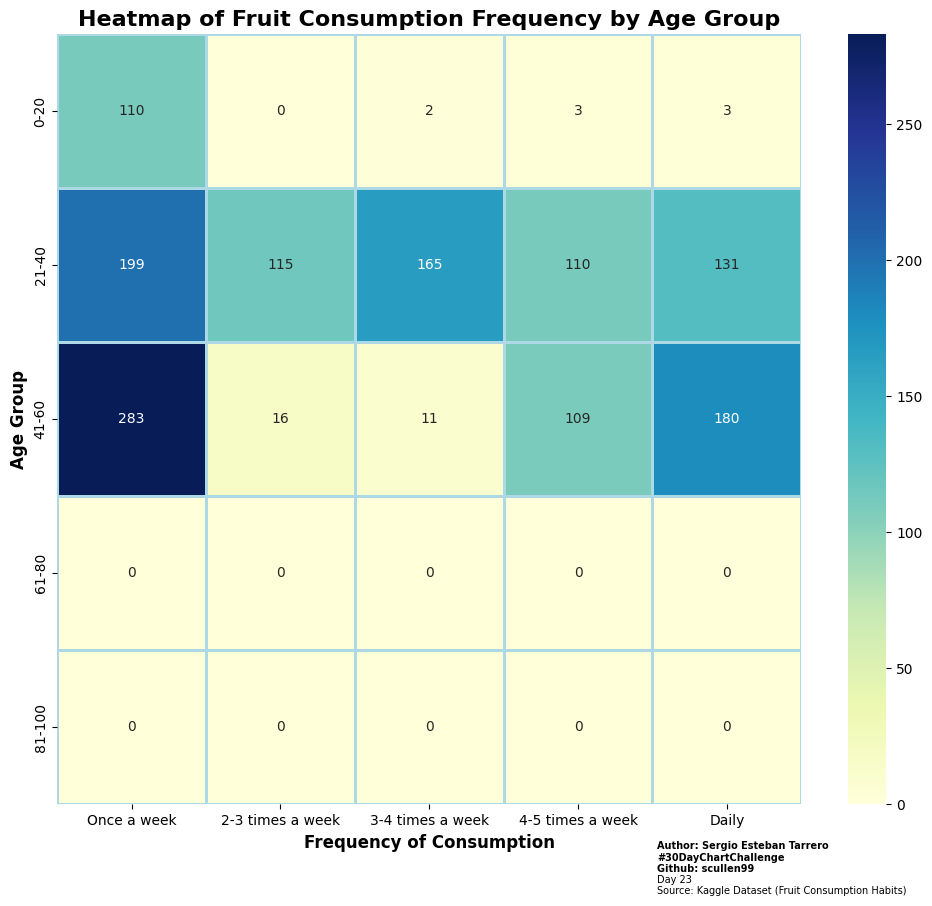

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

column_order = ["Once a week", "2-3 times a week", "3-4 times a week", "4-5 times a week", "Daily"]

heatmap_data = grouped_data.pivot_table(
    index=['Age Group'],
    columns='Frequency of Consumption',
    values='Count',
    aggfunc='sum',
    fill_value=0
)

heatmap_data = heatmap_data[column_order]

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, linecolor='lightblue')
plt.title('Heatmap of Fruit Consumption Frequency by Age Group', fontsize=16, fontweight='bold')
plt.ylabel('Age Group', fontsize=12, fontweight='bold')
plt.xlabel('Frequency of Consumption', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.gcf().text(0.625, 0.042, 'Author: Sergio Esteban Tarrero\n#30DayChartChallenge\nGithub: scullen99', fontsize=7, color='black', ha='left', fontweight='bold')
plt.gcf().text(0.625, 0.020, 'Day 23\nSource: Kaggle Dataset (Fruit Consumption Habits)', fontsize=7, color='black', ha='left')

plt.savefig('SergioEstebanTarreroDay23.png', dpi=300, bbox_inches='tight')

plt.show()